---
layout: default
title: "Unsupervised Learning - K-Means"
categories: Unsupervised
permalink: /ML22/
order: 22
comments: true
---

In [2]:
%pylab --no-import-all inline
plt.rcParams["mathtext.fontset"] = "cm"
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


# Unsupervised learning
When describing unsupervised learning it is useful to define it compared to supervised learning. In supervised learning what we do can be summarized as: given a set of labels, fit an hypothesis that describe the data. In contrast in unsupervised learning we don't have any label (<a href="ML1#iris">one of the first figures</a>)

The training set in an unsupervised learning problem is in the form

$$
\left \{ x^{(1)}, x^{(2)}, x^{(3)}, \ldots, x^{(m)} \right \}
$$

The objective of unsupervised learning is for the algorithm to find some structure in the data.

For example a structure that we can find in data points represented in <a href="#simpleclusters">the figure below</a> is that the points are grouped in two clusters. This would be called a clustering algorithm

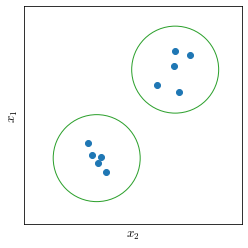

In [3]:
scale = .25
p1, p2 = np.random.rand(2, 5, 2) * scale
fig, ax = plt.subplots()
p2 += scale*2
ax.scatter(*np.r_[p1, p2].T, c='C0')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_2$', fontsize=13)
ax.set_ylabel('$x_1$', fontsize=13);
for p in [p1, p2]:
    ax.add_artist(plt.Circle(p.mean(axis=0), scale, facecolor='none', edgecolor='C2'))
ax.set_aspect('equal')
ax.set_xlim(-scale, 1)
ax.set_ylim(-scale, 1);

<i id="simpleclusters">An example of unsupervised learning problem: unlabeled data is clustered in two groups based on their distance in the feature space $x \in \mathbb{R}^2$</i>

## K-means clustering
In Clustering we want an algorithm to group our data into coherent subgroups.K-means algorithm is by far the most popular and widely used clustering algorithm.

Suppose we have an unlabeled dataset and we want to apply the K-means algorithm to find if there is any structure in it. What the K-means algorithm does is first initialize random points called the **centroids**. In <a href="#kmeanscentroids">the figure below</a> we can see two centroids because we want to group the data in two clusters.



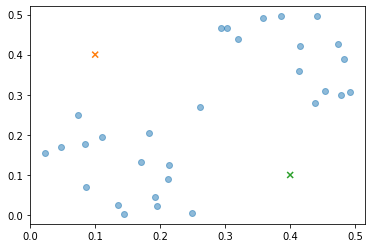

In [4]:
p1, p2 = np.random.rand(2, 15, 2) * scale
fig, ax = plt.subplots()
p2 += scale
colors = ['C1', 'C2']
ax.scatter(*np.r_[p1, p2].T, c='C0', alpha=.5)
cs = np.array([[.1, .4], [.4, .1]])
ax.scatter(*cs.T, c=['C1', 'C2'], marker='x');

<i id="kmeanscentroids">figure caption</i>

K-means is an iterative algorithm; each iteration is composed of two steps shown in <a href="#kmeansteps">the figure below</a>

1. **Cluster assignment** assign each training example $x^{(i)}$ to the closest cluster centroid

2. **Centroid positioning** move the centroids on the average coordinates of the points assigned to that centroid

Iterations stop when the centroids position does not change any further.

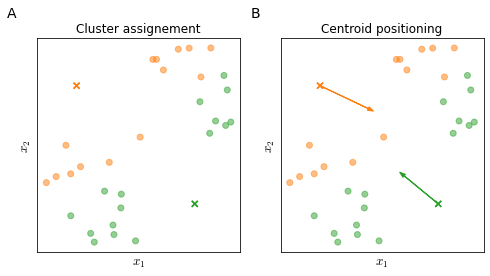

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
points = np.r_[p1, p2]
c1, c2 = cs
d = lambda a, b: np.linalg.norm(b-a, axis=1)
cidx = np.argmin(np.vstack([d(c1, points), d(c2, points)]).T, axis=1)
for ax, l in zip(axes, ['A', 'B']):
    ax.scatter(*np.r_[p1, p2].T, c=[colors[i] for i in cidx], alpha=.5)
    ax.scatter(*cs.T, c=['C1', 'C2'], marker='x')
    ax.scatter(*cs.T, c=['C1', 'C2'], marker='x')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('$x_1$', fontsize=13)
    ax.set_ylabel('$x_2$', fontsize=13)
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
      fontsize=14, va='top', ha='right')
    ax.set_aspect('equal')
axes[0].set_title('Cluster assignement')

pc1 = points[np.invert(cidx.astype(bool))].mean(axis=0)
pc2 = points[cidx.astype(bool)].mean(axis=0)

arr_opts = dict(length_includes_head=True, head_width=.01)
axes[1].arrow(*c1, *pc1-c1, **arr_opts, color='C1')
axes[1].arrow(*c2, *pc2-c2, **arr_opts, color='C2')
axes[1].set_title('Centroid positioning');

<i id="kmeansteps">Computational steps in a single iteration of the K-means algorithm for a set of training examples described by a feature vector $x \in \mathbb{R}^2$: cluster assignment (A) and centroid re-positioning (B)</i>

More formally, the K-means algorithm takes as input:

* The number of clusters $K$
* A training set $\left \lbrace x^{(1)}, x^{(2)}, x^{(3)}, \ldots, x^{(m)} \right \rbrace$

where $x \in \mathbb{R}^n$ since by convention $x_0=1$ is dropped.

Then the algorithm works by

1. randomly initializing $K$ clusters centroids $\{ \mu_1, \mu_2, \ldots, \mu_K \} \in \mathbb{R}^n$

2. Repeat until convergence

    A. cluster assignment: assign each training example to its closest centroid

    $$
    c^{(i)} := \min_k \| x^{(i)} - \mu_k \|^2
    $$

    B. centroid positioning: move each centroid to the average coordinates of its assigned training examples
    
    $$
    \mu_k = \frac{1}{m^{(c=k)}} [x^{(c_1)}, x^{(c_2)}, \ldots] \in \mathbb{R}^n
    $$

If a centroid has no points assigned it can be:

* eliminated, you will then have $K-1$ centroids
* randomly reassigned (less common)

## K-means for non-separated clusters
Until now we have seen the K-means algorithm applied to data were clusters are well separated but sometimes K-means is also applied to non separated clusters. In the example shown in <a href="#tshirtsizes">the figure below</a> we see the height and weight of a set of people. In this case we might be interested in grouping these people in three T-shirt sizes (three clusters).

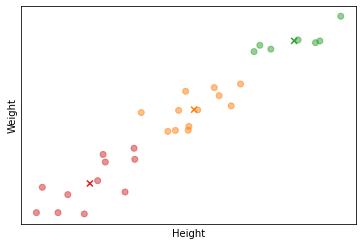

In [6]:
noise = np.random.rand(30, 2) -.5
x = np.linspace(0, 4, 30) 
y = x + noise[:, 1]
x = x + noise[:, 0]

fig, ax = plt.subplots()

kmeans = KMeans(n_clusters=3, random_state=0).fit(np.c_[x, y])
colors = ['C1', 'C2', 'C3']
ax.scatter(*kmeans.cluster_centers_.T, c=colors, marker='x')
ax.scatter(x,y, marker='o', c=[colors[l] for l in kmeans.labels_], alpha=.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Height')
ax.set_ylabel('Weight');

<i id="tshirtsizes">Distribution of people based on their height and weight, clustered in $K=3$ clusters with the K-means algorithms</i>

## K-means optimization objective
Alike to supervised learning also K-means algorithm has an optimization objective. Given

* $c^{(i)}$ index of cluster to which the example $x^{(i)}$ is assigned
* $\mu_k$ centroid $k$
* $\mu_{c^{(i)}}$ centroid of the cluster to which example $x^{(i)}$ is assigned

The cost function $J$ (sometimes called the Distortion cost function) is

$$
J\left( c^{(1)}, \ldots, c^{(m)}, m_1, \mu_1, \ldots, \mu_K, \right) = \frac{1}{m} \sum^m_{i=1} \left \| x^{(i)} - \mu_{c^{(i)}} \right \|^2
$$

and the optimization objective is 

$$
\min_{c^{(1)}, \ldots, c^{(m)}, \\ \mu_1, \ldots, \mu_K} J\left( c^{(1)}, \ldots, c^{(m)}, m_1, \ldots, \mu_K, \right)
$$

## Random Initialization
Correct random initialization prevent the optimization algorithm to stop in local *optima*. There are many possible ways to randomly initialize the cluster centroids, however there is one method that usually works better than the other options.

First, we should have $K < m$. Once defined $K$, we randomly pick $K$ training examples and set $\mu_1, \ldots, \mu_K$ equal to these $K$ selected examples.

While the above method reduces the chances of falling in local *optima* there is still a probability of it happening. A way to prevent that, is to run random initialization and K-means optimization multiple times and then pick the clustering that gave the lowest cost.

Do notice that the need for multiple random initializations reduce while $K$ increases.

## Number of clusters
The best method to choose the number of clusters is usually picking it manually based on considerations or visual inspection of data.

One of the reasons why it is difficult to choose the number of cluster is because it is genuinely ambiguous how many clusters there actually are in a data set.

If no particular requirement is specified (in <a href="#tshirtsizes">figure above</a> we wanted exactly three clusters, for the three sizes of t-shirts S, M, L), a method that is sometimes used is known as the **elbow method**.

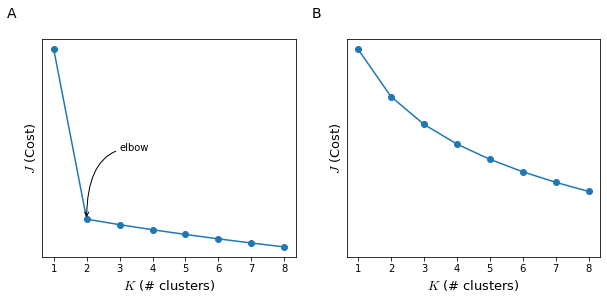

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
x = np.arange(1, 9) + np.array([0] + [10]*7)
axes[0].plot(np.arange(1, 9), -np.log(x), marker='o')
axes[0].annotate('elbow', (2, -np.log(12)), np.array([2, -np.log(12)])+1, 
           arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
x = np.arange(1, 9)
axes[1].plot(x, -np.log(x), marker='o')
for ax, l in zip(axes, ['A', 'B']):
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
      fontsize=14, va='top', ha='right')
    ax.set_yticks([])
    ax.set_xlabel('$K$ (# clusters)', fontsize=13)
    ax.set_ylabel('$J$ (Cost)', fontsize=13);

<i id="elbow">Representation of a good output (A) and bad output (B) of the elbow method for selecting the optimal number of clusters $K$</i>

When using this method we will calculate the cost $J$ as a function of the number of clusters $K$ (<a href="#elbow">figure above</a>) and try to identify a region where there is an elbow (there is a sharp change of the direction of the $J$ by further increasing $K$). such elbow is present in the plot (panel A) than we can select the $K$ at which we have the hinge of the elbow. However usually the $J$ by $K$ function is much less clear (panel B) and it is not suitable to identify an optimal $K$.